In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import regularizers

In [2]:
path = '../input/car-price-prediction/'
file = path + 'CarPrice_Assignment.csv'
file1 = path+ 'Data Dictionary - carprices.xlsx'

In [3]:
df_auto = pd.read_csv(file)
df_auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df_stru = pd.read_excel(file1)
df_stru.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,DATA DICTONARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_auto.shape

(205, 26)

In [6]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df_auto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df_auto.size

5330

In [9]:
df_auto[df_auto.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [10]:
normalized_data=df_auto.copy()

In [11]:
normalized_data.iloc[3,2]="audi 100ls"
normalized_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
column3= pd.get_dummies(normalized_data.iloc[:, 3:4]).astype(dtype="float64")
column4= pd.get_dummies(normalized_data.iloc[:, 4:5]).astype(dtype="float64")
column5= pd.get_dummies(normalized_data.iloc[:, 5:6]).astype(dtype="float64")
column6= pd.get_dummies(normalized_data.iloc[:, 6:7]).astype(dtype="float64")
column7= pd.get_dummies(normalized_data.iloc[:, 7:8]).astype(dtype="float64")
column8= pd.get_dummies(normalized_data.iloc[:, 8:9]).astype(dtype="float64")
column14= pd.get_dummies(normalized_data.iloc[:, 14:15]).astype(dtype="float64")
column15= pd.get_dummies(normalized_data.iloc[:, 15:16]).astype(dtype="float64")
column17= pd.get_dummies(normalized_data.iloc[:, 17:18]).astype(dtype="float64")

In [13]:
normalized_data.drop(columns=["CarName", "fueltype", "aspiration", "doornumber", "carbody","drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"], axis=1, inplace=True)
normalized_data.drop(columns=["car_ID"], axis=1, inplace=True)

In [14]:
max=normalized_data.max()
min=normalized_data.min()
normalized_data=(normalized_data-min)/(max-min)
normalized_data=normalized_data.iloc[:,:-1]
x_labels=normalized_data.iloc[:,-1:]
normalized_data.shape

(205, 14)

In [15]:
x_data =pd.concat([ column3, column4, column5, column6, column7, column8, column14, column15, column17, normalized_data], axis=1)

In [16]:
train_data, test_data, train_labels, test_labels=train_test_split(x_data, x_labels, test_size=0.3, random_state=1)

In [17]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

In [18]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(32, kernel_regularizer=regularizers.l1( l1=0.001), activation = "relu", input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(10,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
  model.add(layers.Dense(8,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
  model.add(layers.Dense(6,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
  model.add(layers.Dense(1))
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [19]:
k= 4
num_val_sample = len(train_data) // k
num_epochs = 100
all_scores = []
all_val_loss_histories = []
all_val_mae_histories = []
all_loss_histories =[]
all_mae_histories = []

for i in range(k):
  print("processing fold #",i)
  val_data = train_data[i*num_val_sample:(i+1)*num_val_sample]
  val_labels = train_labels[i*num_val_sample: (i+1)*num_val_sample]

  partial_train_data=np.concatenate([train_data[:i*num_val_sample], train_data[(i+1)*num_val_sample:]], axis=0)
  partial_train_labels=np.concatenate([train_labels[:i*num_val_sample], train_labels[(i+1)*num_val_sample:]], axis=0)

  model=build_model()
  history = model.fit(partial_train_data, partial_train_labels, validation_data = (val_data, val_labels), epochs= num_epochs, batch_size=1, verbose=0)
  val_loss, val_mae = model.evaluate(test_data, test_labels, verbose=0)
  val_loss_history = history.history["val_loss"]
  val_mae_history = history.history["val_mae"]
  loss_history = history.history["loss"]
  mae_history = history.history["mae"]
  all_loss_histories.append(loss_history)
  all_mae_histories.append(mae_history)
  all_val_loss_histories.append(val_loss_history)
  all_val_mae_histories.append(val_mae_history)
  all_scores.append(val_mae)
ave_val_loss_hist = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
ave_loss_hist = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
ave_val_mae_hist = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]
ave_mae_hist = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
all_scores

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


[0.03182382881641388,
 0.013774294406175613,
 0.014602253213524818,
 0.018052490428090096]

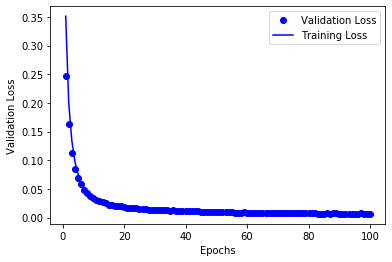

In [20]:
plt.plot(range(1, len(ave_val_loss_hist)+1)[:], ave_val_loss_hist[:], "bo", label="Validation Loss")
plt.plot(range(1, len(ave_val_loss_hist)+1)[:], ave_loss_hist[:], "b", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

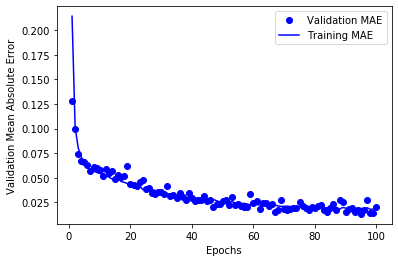

In [21]:
plt.plot(range(1, len(ave_val_mae_hist)+1)[:], ave_val_mae_hist[:], "bo", label="Validation MAE")
plt.plot(range(1, len(ave_val_mae_hist)+1)[:], ave_mae_hist[:], "b", label="Training MAE")
plt.xlabel("Epochs")
plt.ylabel("Validation Mean Absolute Error")
plt.legend()
plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(32, kernel_regularizer=regularizers.l1( l1=0.001), activation = "relu", input_shape=(train_data.shape[1],)))
model.add(layers.Dense(10,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
model.add(layers.Dense(8,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
model.add(layers.Dense(6,kernel_regularizer=regularizers.l1( l1=0.001), activation="relu"))
model.add(layers.Dense(1))
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [23]:
model.fit(train_data, train_labels, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 1ms/step - loss: 0.4701 - mae: 0.3137
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3537 - mae: 0.1452
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3370 - mae: 0.1197
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3258 - mae: 0.1166
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3184 - mae: 0.1132
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3112 - mae: 0.1084
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3004 - mae: 0.0987
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2948 - mae: 0.1006
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2840 - mae: 0.0860
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2786 - mae: 0.0904
Epoch 11/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2704 

5/5 [==============================] - 0s 2ms/step - loss: 0.0391 - mae: 0.0441
Epoch 90/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0392 - mae: 0.0475
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0373 - mae: 0.0391
Epoch 92/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0375 - mae: 0.0451
Epoch 93/100
5/5 [==============================] - 0s 1ms/step - loss: 0.0361 - mae: 0.0392
Epoch 94/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0355 - mae: 0.0395
Epoch 95/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0369 - mae: 0.0500
Epoch 96/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0350 - mae: 0.0407
Epoch 97/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0344 - mae: 0.0398
Epoch 98/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0346 - mae: 0.0465
Epoch 99/100
5/5 [==============================] - 0s 2ms/step - loss: 0.0340 - ma

In [24]:
test_mse_scoe, test_mae_score=model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 3ms/step - loss: 0.0341 - mae: 0.0437


In [25]:
test_mae_score

0.0436626560986042

In [26]:
prediction=model.predict(test_data)

pred_norm=(prediction*(max[-1]-min[-1]))+min[-1]
test_norm = (test_labels*(max[-1]-min[-1]))+min[-1]

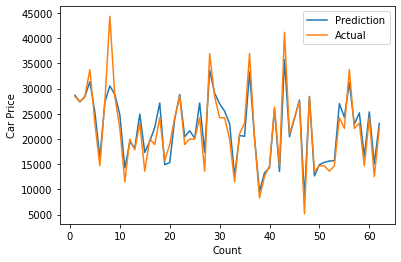

In [27]:
plt.plot(range(1, len(pred_norm[:])+1), pred_norm[:], label="Prediction")
plt.plot(range(1, len(pred_norm[:])+1), test_norm[:], label="Actual")
plt.xlabel("Count")
plt.ylabel("Car Price")
plt.legend()
plt.show()